In [1]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Read CSV data
df=pd.read_csv('/Users/gokul-pritha/Documents/python learning/APY.csv')
df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [3]:
#Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [4]:
#Check the null values 
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [5]:
#Drop the null values
df.dropna(inplace=True)
df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [6]:
#Check the null values 
df.isnull().sum()

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

In [7]:
#Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340383 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       340383 non-null  object 
 1   District    340383 non-null  object 
 2   Crop        340383 non-null  object 
 3   Crop_Year   340383 non-null  int64  
 4   Season      340383 non-null  object 
 5   Area        340383 non-null  float64
 6   Production  340383 non-null  float64
 7   Yield       340383 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 23.4+ MB


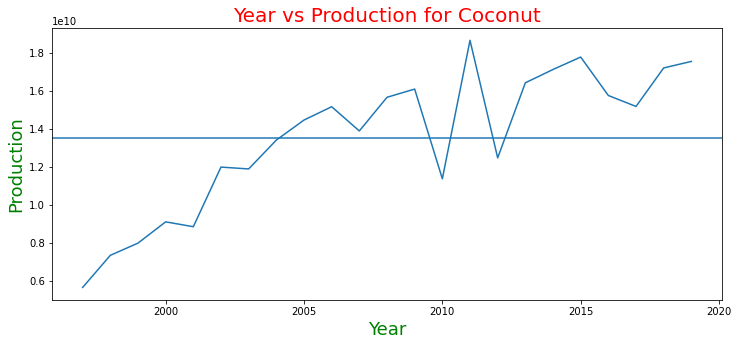

In [8]:
#Find yearwise production for coconut without function
df_rice=df.loc[df['Crop']=='Coconut ']
df_rice.groupby('Crop_Year')['Production'].sum().plot(kind='line',figsize=(12,5))
plt.xlabel('Year',color='green',fontsize=18)
plt.ylabel('Production',color='green',fontsize=18)
plt.title('Year vs Production for Coconut',color='Red',fontsize=20)
plt.axhline(df_rice.groupby('Crop_Year')['Production'].sum().mean())

In [9]:
#Find yearwise production for coconut with function and find the mean production value
def crop_Production(Crop):
    df_crop=df.loc[df['Crop']==Crop]
    df_crop.groupby('Crop_Year')['Production'].sum().plot(kind='line',figsize=(12,5))
    plt.xlabel('Year',color='green',fontsize=18)
    plt.ylabel('Production',color='green',fontsize=18)
    plt.title('Year vs Production',color='Red',fontsize=20)
    plt.axhline(df_crop.groupby('Crop_Year')['Production'].sum().mean(),color='green')
    plt.annotate('Mean production', xy=(1997, df_crop.groupby('Crop_Year')['Production'].sum().mean()+0.02*df_crop.groupby('Crop_Year')['Production'].sum().mean()), fontsize=18)


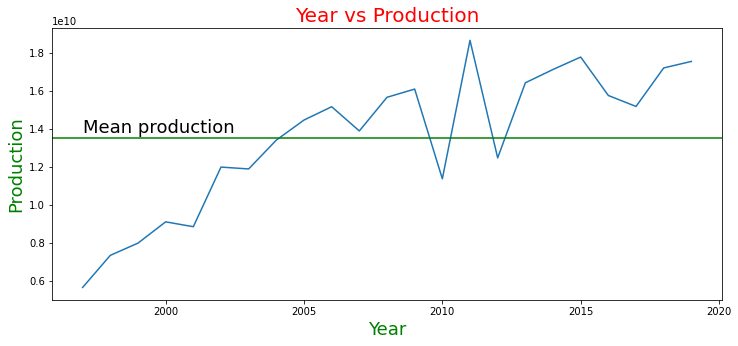

In [10]:
crop_Production('Coconut ')

In [13]:
#Find yearwise yield for coconut with function and find the mean yield value
def crop_yield(Crop):
    df_crop=df.loc[df['Crop']==Crop]
    df_crop.groupby('Crop_Year')['Yield'].sum().plot(kind='line',figsize=(12,5))
    plt.xlabel('Year',color='green',fontsize=18)
    plt.ylabel('Yield',color='green',fontsize=18)
    plt.title('Year vs Yield',color='Red',fontsize=20)
    plt.axhline(df_crop.groupby('Crop_Year')['Yield'].sum().mean(),color='green')
    plt.annotate('Mean Yield', xy=(1997, df_crop.groupby('Crop_Year')['Yield'].sum().mean()+0.010*df_crop.groupby('Crop_Year')['Yield'].sum().mean()), fontsize=18)


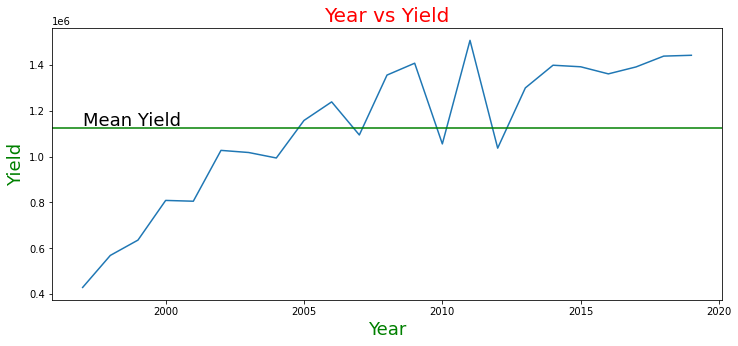

In [14]:
crop_yield('Coconut ')

In [15]:
#Find yearwise Area for coconut with function and find the mean area value
def crop_area(Crop):
    df_crop=df.loc[df['Crop']==Crop]
    df_crop.groupby('Crop_Year')['Area '].sum().plot(kind='line',figsize=(12,5))
    plt.xlabel('Year',color='green',fontsize=18)
    plt.ylabel('Area ',color='green',fontsize=18)
    plt.title('Year vs Area',color='Red',fontsize=20)
    plt.axhline(df_crop.groupby('Crop_Year')['Area '].sum().mean(),color='green')
    plt.annotate('Mean Area', xy=(1997, df_crop.groupby('Crop_Year')['Area '].sum().mean()+0.010*df_crop.groupby('Crop_Year')['Area '].sum().mean()), fontsize=18)


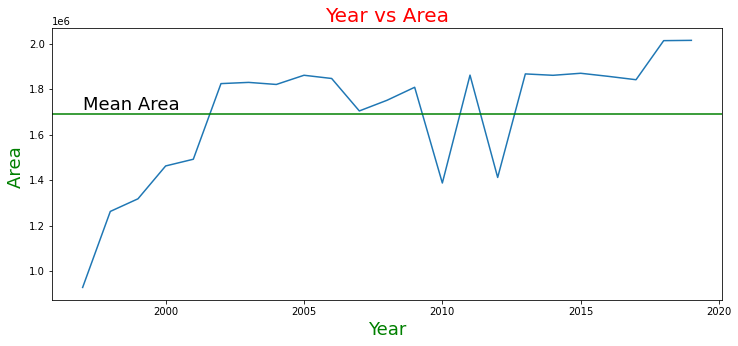

In [16]:
crop_area('Coconut ')

In [17]:
#Find crop vs production for autumn season with function
def crop_cal(Cropyear,season):
    df_temp=df.loc[(df['Crop_Year']==Cropyear)&(df['Season']==season)]
    df_temp.groupby('Crop')['Production'].sum().plot(kind='bar',figsize=(12,5))
    plt.xlabel('Crop',color='green',fontsize=18)
    plt.ylabel('Production',color='green',fontsize=18)
    plt.title('Crop vs Production',color='Red',fontsize=20)

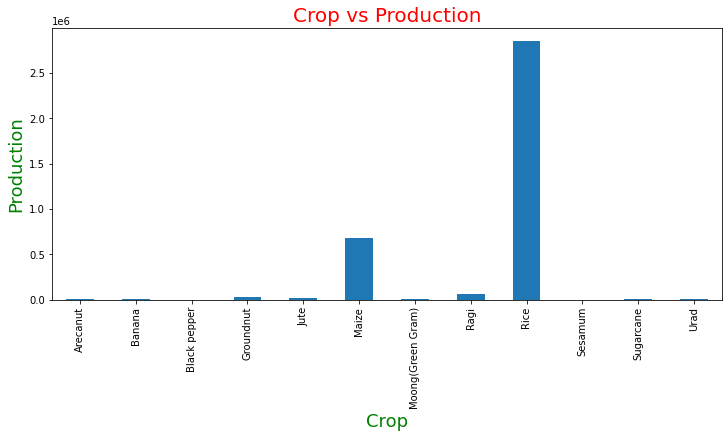

In [18]:
crop_cal(2008,'Autumn     ')

In [19]:
#Find crop vs production for Punjab state with function
def crop_state(state):
    df_crop=df.loc[df['State']==state]
    df_crop.groupby('Crop')['Production'].sum().plot(kind='bar',figsize=(12,5))
    plt.xlabel('Crop',color='green',fontsize=18)
    plt.ylabel('Production',color='green',fontsize=18)
    plt.title('Crop vs Production',color='Red',fontsize=20)
        

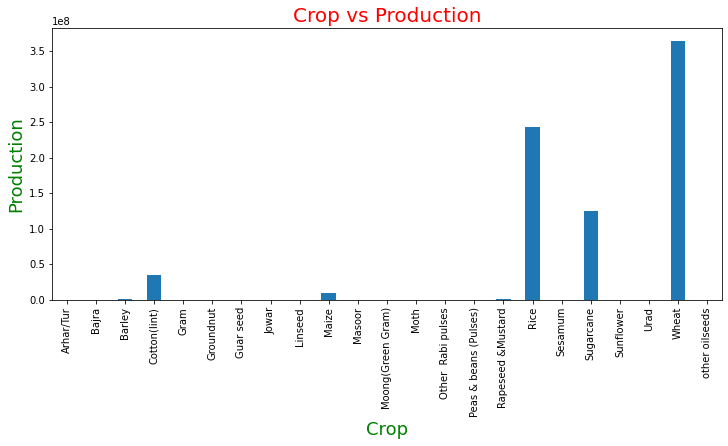

In [20]:
crop_state('Punjab')